In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import pycountry
import seaborn as sns

data_2021_2023 = pd.read_csv('salaries.csv')
data_2017_2020 = pd.read_csv('2019_Data_Professional_Salary_Survey_Responses.csv')

#  Data Cleaning

#### Copy of dataframe

In [53]:
data_2017_2020_copy = data_2017_2020.copy()
data_2021_2023_copy = data_2021_2023.copy()

#### Delete columns

In [54]:
data_2021_2023_copy = data_2021_2023_copy\
    .drop(["company_size", "remote_ratio", "salary_currency", "company_size", "salary"], axis=1)

In [55]:
data_2017_2020_copy = data_2017_2020_copy.drop(['Timestamp', 'PostalCode',
                                                'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
                                                'ManageStaff', 'YearsWithThisTypeOfJob',
                                                'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
                                                'DatabaseServers', 'Education', 'EducationIsComputerRelated',
                                                'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
                                                'PopulationOfLargestCityWithin20Miles',
                                                'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
                                                'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter',
                                                'EmploymentSector'], axis=1)

#### Rename columns

In [56]:
data_2017_2020_copy.loc[:, 'EmploymentStatus'] = data_2017_2020_copy['EmploymentStatus']\
    .replace('Full time employee','Full time')\
    .replace('Full time employee of a consulting/contracting company', 'Full time')\
    .replace('Independent or freelancer or company owner', 'Freelance')\
    .replace('Independent consultant, contractor, freelancer,  or company owner', 'Contract')

In [57]:
data_2021_2023_copy.loc[:, 'employment_type'] = data_2021_2023_copy['employment_type']\
    .replace('FT','Full time')\
    .replace('CT', 'Contract')\
    .replace('PT', 'Part time')\
    .replace('FL', 'Freelance')

#### Rename row values

In [58]:
def get_country_name(initial):
    try:
        country = pycountry.countries.get(alpha_2=initial)
        return country.name
    except AttributeError:
        return initial

In [59]:
data_2021_2023_copy['company_location'] = data_2021_2023_copy['company_location'].apply(get_country_name)
data_2021_2023_copy.rename(columns={'company_location': 'Country'}, inplace=True)
data_2021_2023_copy['employee_residence'] = data_2021_2023_copy['employee_residence'].apply(get_country_name)

In [60]:
data_2021_2023_copy['experience_level'] = data_2021_2023_copy['experience_level'] \
    .replace('EN', 'Junior') \
    .replace('MI', 'Internmediate') \
    .replace('SE', 'Expert') \
    .replace('EX', 'Director')

#### Clean rows salaryUSD values

In [63]:
data_2017_2020_copy = data_2017_2020_copy.copy()
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace("$", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(",", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(" ", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(".", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(".00", ""))

#### Convert object in int

In [ ]:
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].astype(int)

In [ ]:
data_2017_2020_copy.loc[:, "JobTitle"] = (data_2017_2020_copy.loc[:, "JobTitle"]
                                          .replace("Engineer", "Data Engineer")\
                                          .replace("Analyst", "Data Analyst")\
                                          .replace("Architect", "Data Architect")\
                                          .replace("Manager", "Data Manager")\
                                          .replace("Developer: Business Intelligence (SSRS, PowerBI, etc)", "BI Developer"))

#### Rename columns and select job title

In [ ]:
retained_values = ["Data Engineer", "BI Developer", "Data Architect", "Data Analyst", "Data Manager", "Data Scientist"]

In [ ]:
data_2017_2020_copy.loc[:, 'JobTitle'] = data_2017_2020_copy.loc[:, 'JobTitle'].apply(
    lambda x: x if x in retained_values else 'Other')

In [ ]:
data_2021_2023_copy.loc[:, 'job_title'] = data_2021_2023_copy.loc[:, 'job_title'].apply(
    lambda x: x if x in retained_values else 'Other')

#### Convert object in datetime

In [ ]:
data_2017_2020_copy['Survey Year'] = pd.to_datetime(data_2017_2020_copy['Survey Year'], format='%Y')
data_2021_2023_copy['work_year'] = pd.to_datetime(data_2021_2023_copy['work_year'], format='%Y')

In [ ]:
data_2017_2020_copy = data_2017_2020_copy.rename(
    columns={"Survey Year": "work_year", "SalaryUSD": "salary_in_usd", "EmploymentStatus": "employment_type",
             "JobTitle": "job_title"})

#### Concatenate dataframes and fill NaN values

In [ ]:
data_2017_2023 = pd.concat([data_2017_2020_copy, data_2021_2023_copy], ignore_index=True)
data_2017_2023.loc[:, "experience_level"] = data_2017_2023.loc[:, "experience_level"].fillna("unknown")
data_2017_2023.loc[:, "employee_residence"] = data_2017_2023.loc[:, "employee_residence"].fillna("unknown")

# Data visualization

In [ ]:
salaryUSD_full_time_2017_2023 = data_2017_2023.copy()
salaryUSD_full_time_2017_2023.loc[:, "job_title"] = salaryUSD_full_time_2017_2023.loc[:, "job_title"][salaryUSD_full_time_2017_2023.loc[:, "job_title"] != "Other"]
start_year = 2017

for i in range(0, 7):
    salaryUSD_full_time_2017_2023[f'SalaryUSD_Full_time_{start_year}'] = salaryUSD_full_time_2017_2023['salary_in_usd'][
        (salaryUSD_full_time_2017_2023['work_year'] == f'{start_year}-01-01') & (
                salaryUSD_full_time_2017_2023['employment_type'] == 'Full time')]
    start_year += 1

In [ ]:
Q1 = data_2017_2023.loc[:,'salary_in_usd'].quantile(0.25)
Q3 = data_2017_2023.loc[:,'salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
data_filtre = data_2017_2023[(data_2017_2023.loc[:,'salary_in_usd'] >= Q1 - 1.5 * IQR) & (data_2017_2023.loc[:,'salary_in_usd'] <= Q3 + 1.5 * IQR)]
data_filtre = data_filtre[data_filtre.loc[:,'job_title'] != "Other"]

c:\Users\benoi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


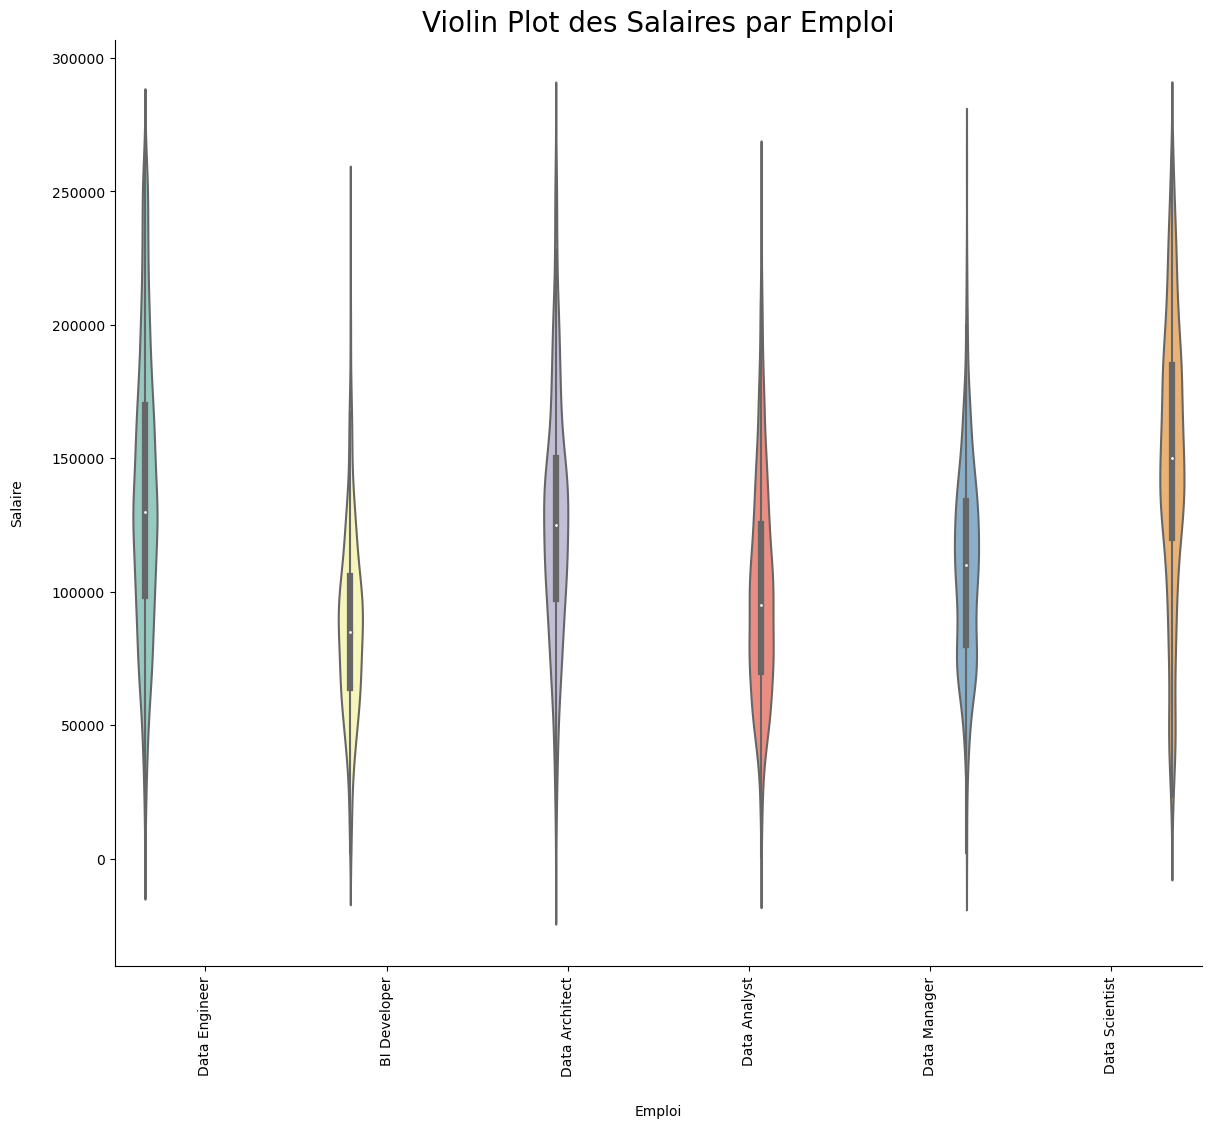

In [64]:
sns.catplot(x = "job_title", hue = "job_title", y= "salary_in_usd", palette="Set3",height=10, aspect=1.2,data = data_filtre, kind="violin", legend=False)
plt.xticks(rotation=90)
plt.ylabel('Salaire', labelpad=20)
plt.xlabel('Emploi', labelpad=20)
plt.title('Violin Plot des Salaires par Emploi', fontsize=20)
plt.show()


c:\Users\benoi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


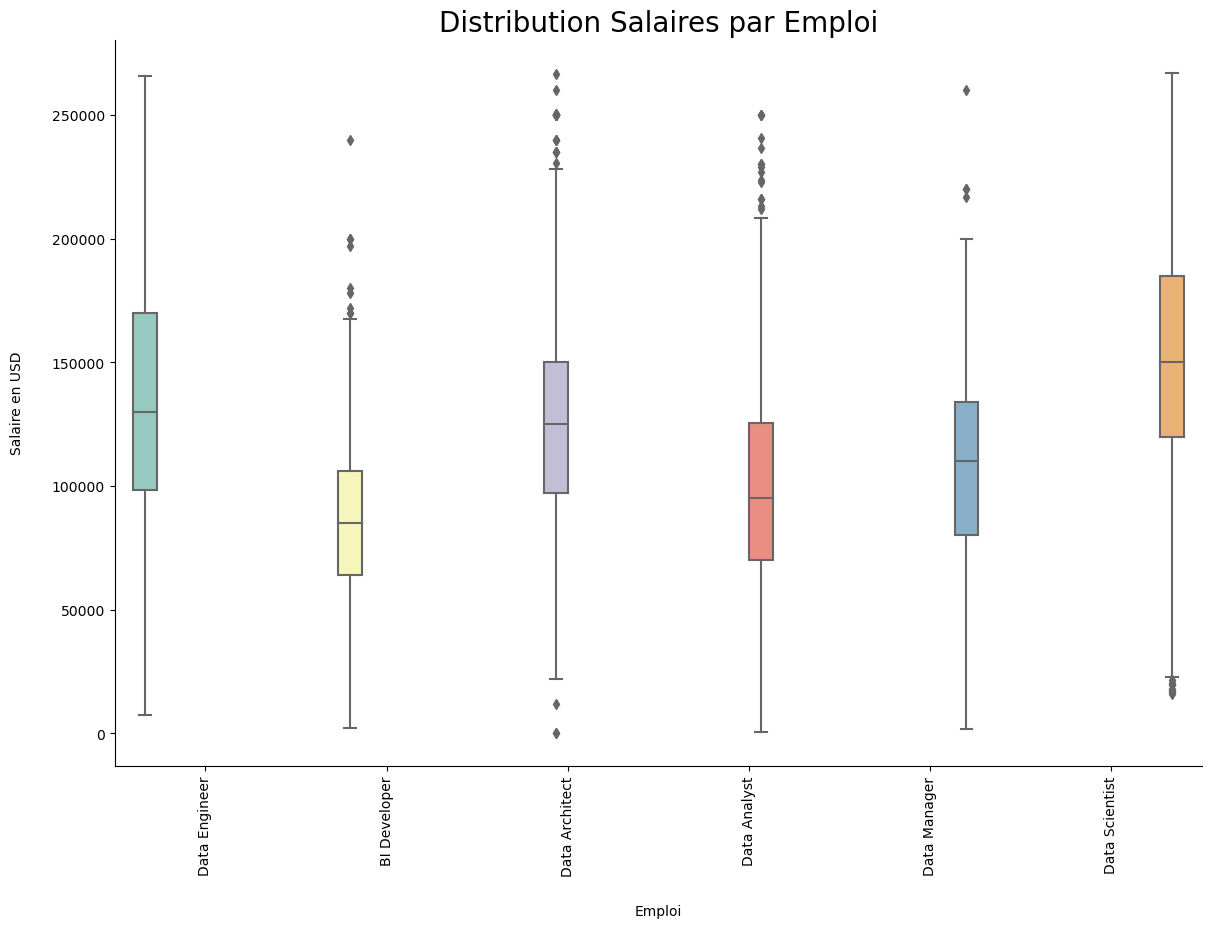

In [ ]:
sns.catplot(x ="job_title" , hue = "job_title", y= "salary_in_usd", palette="Set3",height=8, aspect=1.5,data = data_filtre, kind="box", legend=False)
plt.xticks(rotation=90)
plt.ylabel('Salaire en USD', labelpad=20)
plt.xlabel('Emploi', labelpad=20)
plt.xticks(rotation=90)
plt.title('Distribution Salaires par Emploi', fontsize=20)

plt.show()

#### Export data to csv and for power bi

In [ ]:
data_2017_2023.to_csv("Salary_2017_2023.csv")

In [ ]:
pivot_table = salaryUSD_full_time_2017_2023.pivot_table(values=["SalaryUSD_Full_time_2017", "SalaryUSD_Full_time_2023"], index=['job_title'], aggfunc='mean')
pivot_table["rate"] = round(abs(((pivot_table["SalaryUSD_Full_time_2017"] - pivot_table["SalaryUSD_Full_time_2023" ])/ pivot_table["SalaryUSD_Full_time_2023"]) * 100))
pivot_table.to_csv("rate_salary.csv")